In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Q2(noise remove)

## imports part

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

## a) removing the noise of picture with FFT

In [ ]:
# read the saffrun image from the google drive
path = '/content/drive/MyDrive/ColabNotebooks/FCV/HW2/images/saffrun.jpg'
image = cv2.imread(path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
# --------------------------------------------
# calculate the furie transform of the gray scale image
fft = np.fft.fft2(gray)
#  shift the zero-frequency component to the center of the spectrum using NumPy’s fftshift() function
fshift = np.fft.fftshift(fft)

magnitude_spectrum = 15 * np.log(np.abs(fshift))
cv2_imshow(magnitude_spectrum)

rows, cols = gray.shape
crow, ccol = rows//2, cols//2
mask = np.zeros((rows, cols), dtype=np.uint8)

mask[crow-100:crow+100, ccol-150:ccol+150] = 1
# Calculate inverse Fourier Transform

fft_filtered = fshift * mask
img_filtered = np.abs(np.fft.ifft2(np.fft.ifftshift(fft_filtered)))
img_filtered = cv2.normalize(np.float32(img_filtered), None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

fft2 = np.fft.fft2(img_filtered)
fshift2 = np.fft.fftshift(fft2)
magnitude_spectrum2 = 15 * np.log(np.abs(fshift2))
# cv2_imshow(magnitude_spectrum2)

cv2_imshow(img_filtered)
cv2_imshow(magnitude_spectrum2)


## b) Canny edge detection

In [ ]:
edges = cv2.Canny(img_filtered, 70, 200)
cv2_imshow(edges)

## c) calculate the image gradian

In [ ]:
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Calculate the x and y gradients using the Sobel filter
grad_x = cv2.filter2D(img_filtered, -1, sobel_x)
grad_y = cv2.filter2D(img_filtered, -1, sobel_y)

# Compute the magnitude and direction of the gradient
grad_mag = np.sqrt(grad_x**2 + grad_y**2)
grad_dir = np.arctan2(grad_y, grad_x)

print("Magnitude Matrix:\n", grad_mag)
print("Direction Matrix:\n", grad_dir)

# Q5(image detection)

## import part

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

## a) read image

In [ ]:
path = '/content/drive/MyDrive/ColabNotebooks/FCV/HW2/images/Q7.png'
image = cv2.imread(path)
img1 = image.copy()
img2 = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

## b) findContours

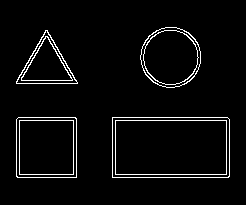

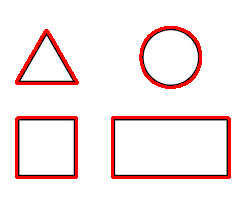

In [ ]:
edge = cv2.Canny(gray, 0, 800)
cv2_imshow(edge)
contours, hierarchy = cv2.findContours(edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img1, contours, -1, (0, 0, 255), 2)
cv2_imshow(img1)

## c) approxPolyDP

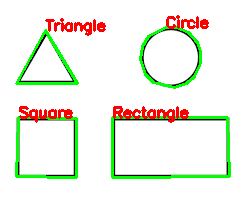

In [ ]:
for cnt in contours:
  approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
  corners = len(approx)
  if corners == 3:
    cv2.drawContours(img2, [approx], 0, (0,255,0), 2)
    cv2.putText(img2, 'Triangle', tuple(approx[0][0]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 2)
  elif corners == 4:
    x,y,w,h = cv2.boundingRect(approx)
    aspect_ratio = float(w)/h
    if aspect_ratio >= 0.95 and aspect_ratio <= 1.05:
        cv2.drawContours(img2, [approx], 0, (0,255,0), 2)
        cv2.putText(img2, 'Square', tuple(approx[0][0]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 2)
    else:
        cv2.drawContours(img2, [approx], 0, (0,255,0), 2)
        cv2.putText(img2, 'Rectangle', tuple(approx[0][0]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 2)
  else:
    cv2.drawContours(img2, [approx], 0, (0,255,0), 2)
    cv2.putText(img2, 'Circle', tuple(approx[0][0]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 2)

cv2_imshow(img2)